# 3 - Model Evaluation

Hi guys. If you managed to complete the last session then congratulations - you just created your first data science/machine learning algorithm! In this session we are going to be taking things a step further. 

One of the key things you will have to as a data scientist is *evaluate* your models. This means, you will often need to tell how well you algorithm is performing. 

Last time we looked at the problem of trying to predict whether an animal is a dog or a cat based on its weight and tail length. You built an algorithm that could guess on a new example, whether it was a dog or cat. The way it could make this guess is by having looked at a set of **training data**, that is data where we are told whether it is a dog or a cat. 


## Training data

| Weight (kg) | Tail length (cm) | Cat or dog? |
 ----------- | ----------- | ---------------- | 
|6.6         | 43           | Cat         | 
|  32          | 31               |Dog         |
| 41          | 56               | Dog         |
| 4.5         | 46               |Cat         |
| $\vdots$       | $\vdots$    | $\vdots$    |    



## Unknown data??

| Weight (kg) | Tail length (cm) |Cat or dog? | 
| ----------- | ----------- | ---------------- |
| 48         | 41               | ???         |
|  21        | 47               |???         |
|3.8          | 25               | ???         | 
| 29         | 26               | ??? |         
| $\vdots$    | $\vdots$    | $\vdots$         |


But once we have made our guesses on the new unknown data, how do we know how well we have done? Did we get 50% right? 90% right? 0% right???  



![](images/cat-dog.jpg)


# Accuracy: how well am I doing?


This week we're going to talk about accuracy.

Accuracy can be thought of at "the percent that you get right". What if you got 30/40 in a biology class test, that would mean you had an accuracy of 

$$
\text{accuracy} = \frac{30}{40} = 75  \%
$$

In our example, it's like the algorithm is taking a test. Every question is the same: "is this animal a dog or a cat?". It's like taking a multiple choice test where there are only two answers for each question. 

What happens when we as ask the algorithm to guess for some examples is hasn't seen? It will get some wrong and some right. We can calculate the accuracy as 

$$
\text{accuracy} = \frac{\text{number guessed correctly}}{\text{total number of guesses}} \%
$$


## This lesson: what you will need

In order to complete this lesson, we're going to use another Python package: scikit learn. This one is fantastic for doing data science and machine learning. 

#### On the topic of python packages!

> There are essentially four packages that every data scientist uses at some time or another. Now could be a good time to make sure you have them installed. They are
1. **Numpy**
2. **Matplotlib**
3. **Pandas** 
4. **Scikit learn**
> They can be installed by going to the command line and typing  

```
pip install numpy matplotlib pandas scikit-learn

```
> If you run this and you already have the packages installed don't worry - it won't install twice. Or just 
```
pip install scikit-learn
```
> If you know you have the others already.



Like all other packages, we will need to install this using the command prompt. In order to install it, open a new command prompt (if you're using windows, click the start button and type `cmd`).


We can then import and use all the scikit learn functions in python

```python
import sklearn
```

Before we dive in to the content of this week, let's just have a quick reminder of what we covered last time. 

## Last week: The 5-nearest neighbours algorithm reminder


To predict whether a new animal is a dog or a cat, we calculate the *distance* between our target point and all the other collected points on the graph of weight vs tail length.

It's not a real distance you could measure! We are talking about an imaginary *mathematical* distance. Every pair of measurements $\text{(weight, tail length)}$ can be thought of as a point on an x-y graph. It it the "distance" between these points that we are concerned with. 

Once we've made those distance calculations, we then only consider only the 5 closest points to our target point that we want to guess. If more of these nearby points are dogs, we predict that the new animal is a dog. Conversely, if the new point is closer to more cats, we predict it is a cat. 

Take a look at the interactive graph below, which demonstrates this concept. 


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# the usual imports! 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
%matplotlib notebook
np.set_printoptions(precision=2, linewidth=500, threshold=500, suppress=True, edgeitems=5)

<IPython.core.display.Javascript object>


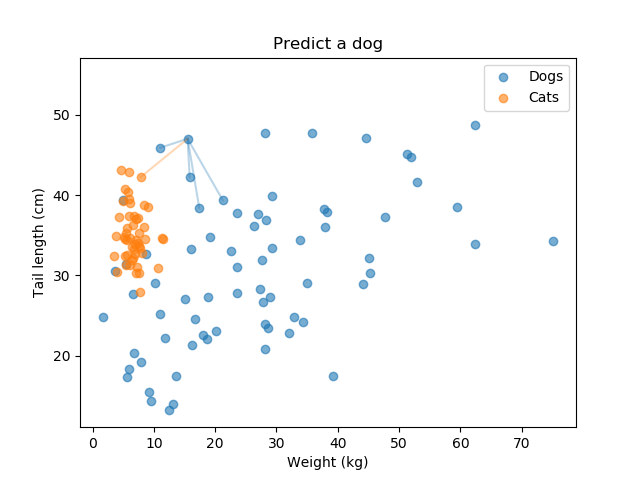

interactive(children=(FloatSlider(value=15.5, description='weight', max=70.0, step=0.01), Output()), _dom_clas…

interactive(children=(FloatSlider(value=47.0, description='tail', max=70.0, min=10.0, step=0.01), Output()), _…

In [4]:
from my_scripts.lesson3 import make_graph_1
make_graph_1()

## How well did we do? 

In order to begin talking about our accuracy we need to talk about two very important concepts:

1. Training data 
2. Test data 

When we receive our labelled data, that is, the list of weights and tail lengths and a label telling us what animal type it is, we can split it into two groups. 

Group 1 (the training data) will be used as the points on the graph that we are allowed to measure to. We will then try and predict the label of group 2 (the test data) and compare it with the truth. That way we can assess the accuracy!


## Exercise 1

Execute the cell below, which imports data from another file called `X` and `y`. 

`X` contains all of our animal measurements $\text{(weight, tail length)}$, stacked into a rectangle (a 2d numpy array!). It looks something like this


$$
X = \begin{bmatrix} 6.6  &  43 \\ 32 & 31 \\41 & 56\\ 4.5 & 46\\ \vdots  & \vdots \end{bmatrix}
$$

`y` contains the true label for each of these examples, in the same order. A 1 represents a dog and a 0 represents a cat. 



$$
 \mathbf{y} = \begin{bmatrix} 0 & 1 & 1  & 0 & \cdots \end{bmatrix}
$$ 

a) Print out these two variables. What can you see about them? Try printing `X.shape` and `y.shape`. What do you notice?


In [5]:
from my_scripts.lesson3 import X, y

# print some things here

print()

## Exercise 1 

b) Can you tell how many dogs, and how many cats there are in this data set?

> HINT: What happens if you print the sum of all the elements in y, by using `np.sum(y)`?



In [ ]:

# how many total examples do we have? 
# is it possible to count the number of dogs and the number of cats?



## Scikit Learn

Scikit learn has lots of helpful features that make some things easer. One great example is their function 

```
train_test_split
```

This will take all of our data and automatically split it randomly into a train set and a test set, at some ratio we specify. 

Take a look at the code below.

In [6]:
# run me!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

![](images/tts.png)


Here

```
test_size=0.2
```

means we want 20% of our data to be used for testing and 80% used for training. This is usually *roughly* the proportion people go for. 

## Exercise 2

Find out what the shape of all these new arrays are by using the `.shape` attribute. 

In [ ]:
## try printing them out - how are these new arrays shaped? 

In [7]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Let's go through these lines one by one

![](images/skimport.png)

![](images/kn.png)

![](images/fit.png)

That's it! The classifier is now ready to make new predictions

In [8]:
# run me!
y_pred = classifier.predict(X_test)

![](images/ypred.png)

## Exercise 3

a) Print out the variable `y_pred`. What do you notice about it? Also, print out the variable `y_test`. Do they look similar?

b) Next, type

```python
print(y_pred == y_test)
```

This will compare all the elements of `y_pred` and `y_test`. If they are the same, we will get `True`, if they are false, we will get `False`. What do you notice here

c) Finally, type

```python
print((y_pred == y_test).sum())
```

This will "add" together all of these true and false elements. What do you notice here? 

## How many did we get right??

Again we can use another scikit learn function to help us determine the accuracy of our predictions

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy * 100, '%')

Accuracy:  93.75 %


Not too bad! We could also work this out ourselves, without the need for sklearn


In [10]:
number_correct = (y_test == y_pred).sum()

total_number =  len(y_test)

accuracy = number_correct / total_number

print(accuracy * 100)

93.75


## But wait? Is there more?

Ok, so we know how many we got right over all, but can we get any more information? 

If you think about it, when we make a guess, there are four possible things that can happen

1. We guessed it was a dog, and it was a dog :)
2. We guessed it was a cat, and it was a cat :)
3. We guessed it was a cat, but it was a dog :(
3. We guessed it was a dog, but it was a cat :(

If we want to answer all these questions at once we can use what's known as a **confusion matrix**. That's a complex name for something that's actually quite simple. It just gives you the answer to all four of those questions, arranged into a square. 

In [11]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[52  2]
 [ 8 98]]


![](images/conf.png)


We can also get a nice plot of this by using another scikit-learn function.

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(conf_matrix, display_labels=['Cat', 'Dog']).plot(cmap=plt.cm.Blues)

<IPython.core.display.Javascript object>

## Tuning hyperparameters: what is the best value of $k$?

You may already have noticed that the real name of the algorithm we have looked at is not actually "5-nearest neighbours", but *k-nearest neighbours*. The $k$ we are referring to here is the number of closest points we look at when making our decision as to whether the new example is a dog or a cat. This is what's known as a model choice, or a **hyperparameter**. In general when we do data science and machine learning we will have to make these kinds of decisions. Take a look at the code below

In [12]:
for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test) 
    
    print(f'When k is {k} we get an accuracy of {accuracy * 100:.1f}%')
    

When k is 1 we get an accuracy of 94.4%
When k is 2 we get an accuracy of 93.8%
When k is 3 we get an accuracy of 94.4%
When k is 4 we get an accuracy of 94.4%
When k is 5 we get an accuracy of 93.8%
When k is 6 we get an accuracy of 94.4%
When k is 7 we get an accuracy of 94.4%
When k is 8 we get an accuracy of 95.0%
When k is 9 we get an accuracy of 94.4%
When k is 10 we get an accuracy of 93.8%


You may notice that when we look at an even number of neighbours a problem could arise! What if there are an equal number of dogs and cats? In this algorithm, if that occurs, we default to the closest neighbour and look at the label of that one. If the closest neighbour is a dog, we guess dog. If it's a cat, we guess cat. 

## Exercise 4

From this information, which value of $k$ would you choose?


## A better way of estimating accuracy? 

This is all well and good, but there's still some *randomness* here. How do we know that if we had split our data into a different training set and test set, would have got a different accuracy? In fact, it's likely that we would have. This is where the idea of *cross validation* comes in. 

The idea is basically this

1. Split your total data into 5 chunks
2. For each of these 5 chunks, use this chunk as test data, and train on the rest
3. Take your *average* accuracy over these 5 chunks

Again, scikit learn can be very helpful here. Take a look at the code below

In [ ]:
from sklearn.model_selection import cross_val_score


for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    
    classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(classifier, X, y, cv=5)
    average_accuracy = scores.mean()
    
    print(f'When k is {k} we get an average accuracy of {average_accuracy * 100:.1f}%')

## Exercise 5

Based on this new information, which value of $k$ would you choose?

## That's all folks :P